In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
path = "~/Repositories/datasets/analytics_update/"
df_t = pd.read_csv(path+"trans.csv")

# Amount differences

In [3]:
df_t.gw_error.fillna(value="", inplace=True)
len(df_t[df_t['gw_error'].str.contains("fraud|Fraud")].gw_error)

df_tfraudulent = df_t[df_t['gw_error'].str.contains("fraud|Fraud")]
df_tnonfraudulent = df_t[~df_t['gw_error'].str.contains("fraud|Fraud")]

amounts_fraudulent_mn = df_tfraudulent.groupby("org").amount.mean()
amounts_nonfraudulent_mn = df_tnonfraudulent.groupby("org").amount.mean()
amounts_nonfraudulent_mad = df_tnonfraudulent.groupby("org").amount.mad()

df_amounts = pd.DataFrame({
        "fraud_amount_mean": amounts_fraudulent_mn,
        "nonfraud_amount_mean": amounts_nonfraudulent_mn,
        "nonfraud_amount_mad": amounts_nonfraudulent_mad
})
df_amounts["org"] = df_amounts.index

In [4]:
len(df_amounts[~df_amounts.fraud_amount_mean.isnull()].groupby('org')[['fraud_amount_mean', 'nonfraud_amount_mean']].mean())

360

In [5]:
def calc_abs(x):
    if x.fraud_amount_mean is not None:
        return x.nonfraud_amount_mean - x.fraud_amount_mean
    else:
        return np.NaN
    
def calc_perc(x):
    if x.fraud_amount_mean is not None:
        return (x.fraud_amount_mean / x.nonfraud_amount_mean) * 100
    else:
        return np.NaN

In [6]:
df_amounts["diff_abs"] = df_amounts.apply(calc_abs, axis=1)
df_amounts["diff_perc"] = df_amounts.apply(calc_perc, axis=1)

In [7]:
df_amounts[~df_amounts.fraud_amount_mean.isnull()].head(20)

,fraud_amount_mean,nonfraud_amount_mad,nonfraud_amount_mean,org,diff_abs,diff_perc
org,,,,,,
25,22.150000,271.541446,235.330897,25,213.180897,9.412279
31,1.000000,152.971798,150.604168,31,149.604168,0.663992
33,51.696970,62.643352,62.274372,33,10.577403,83.014839
39,7.473684,1005.607034,588.970116,39,581.496432,1.268941
40,100.000000,54.327241,66.451631,40,-33.548369,150.485397
42,18.605442,271.988030,257.672837,42,239.067395,7.220568
43,68.143333,131.308403,91.079235,43,22.935902,74.817639
61,33.510638,124.430031,120.548854,61,87.038216,27.798388
79,5.156250,232.811533,196.187276,79,191.031026,2.628229


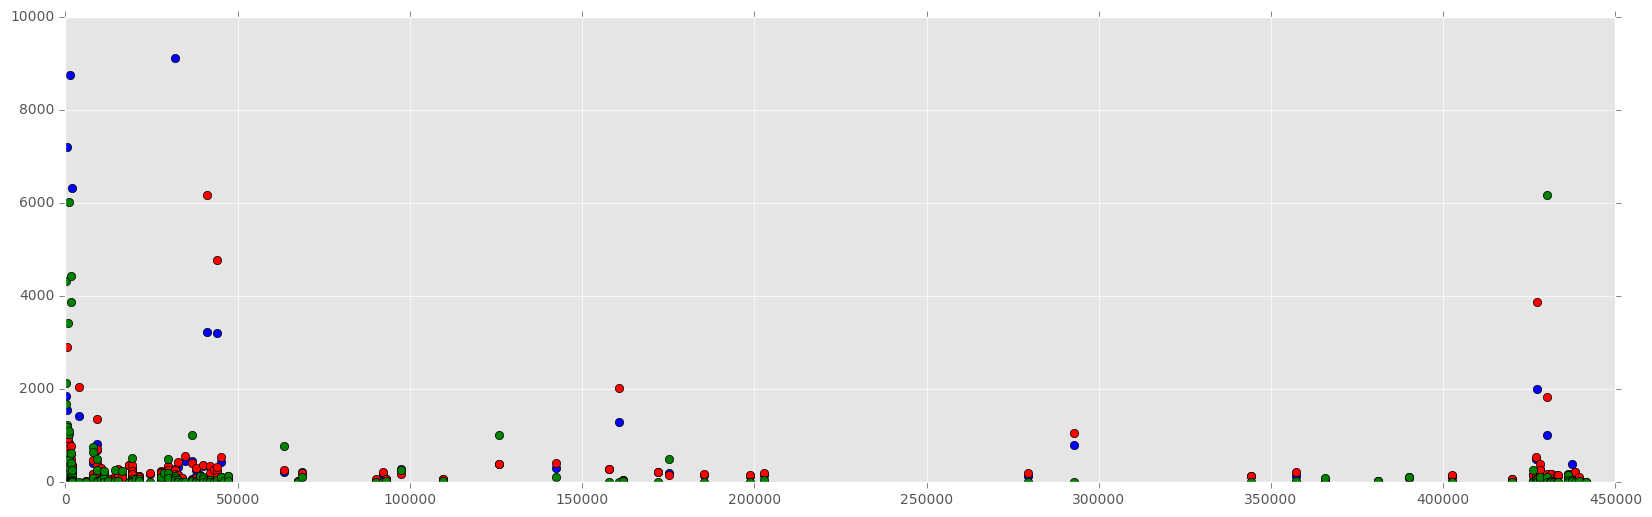

In [8]:
x = df_amounts[~df_amounts.fraud_amount_mean.isnull()].org
nonfraud_amount_mean = df_amounts[~df_amounts.fraud_amount_mean.isnull()].nonfraud_amount_mean
nonfraud_amount_mad = df_amounts[~df_amounts.fraud_amount_mean.isnull()].nonfraud_amount_mad
fraud_amount_mean = df_amounts[~df_amounts.fraud_amount_mean.isnull()].fraud_amount_mean

plt.figure(figsize=(20,6))
plt.ylim(0, 10000)
plt.plot(x, nonfraud_amount_mean, 'bo')
plt.plot(x, nonfraud_amount_mad, 'ro')
plt.plot(x, fraud_amount_mean, 'go')

# Time differences